In [20]:
# Name: Ashish Srivastava
# Section : 001
# Project: Data Visualization Project – Baseball
# Description: This project demonstrates all of the skills we have learned in CSCI1200 thus far to
#              a program in a modular way, become acquainted with graphing and data visualization,
#              and implement a large program that works with real-world data.

# don't forget to rename this file!

# DO NOT LEAVE CODE THAT CAUSES ERRORS UNCOMMENTED IN THIS NOTEBOOK
# DO NOT LEAVE NON-CODE THAT CAUSES ERRORS UNCOMMENTED IN THIS NOTEBOOK
# also known as: make sure that your comments are comments!

In [21]:
%matplotlib inline


import matplotlib.pyplot as plt
import statistics

# You may add more imports as needed
import random
import numpy as np

# "BD" stands for "batting data"
class BD:
    year = 0
    player_id = 1
    first_name = 2
    last_name = 3
    team_name = 4
    games = 5
    at_bats = 6
    runs = 7
    hits = 8
    doubles = 9
    triples = 10
    home_runs = 11
    rbi = 12
    walks = 13
    hbp = 14
    stolen_bases = 15
    caught_stealing = 16
    strike_outs = 17
    sac_flies = 18
    position = 19

In [22]:
def verify_baseball_data(data):
    """
    Verifies the structure and format of the baseball data:
        checks that all rows have the same number of columns
        checks that each column is the correct type (str for string columns, int for int columns)
        checks that it has the correct number of rows and the correct number of columns
    
    If your data is in the right format, you'll see the output:
        Rows: 74750
        Cols: 20
        Congrats! You have the correct shape of data!

    If you see something else, this will give you an indication of what is not right.

    Parameters:
    -----------
        data : list of lists
            From the baseball data (each sublist corresponds to a row from the input file)
    """
    rows = len(data)
    cols = len(data[0])

    # make sure all rows have the same number of columns
    same_number_columns = True
    i = 0
    while i < len(data):
        row = data[i]
        if len(row) != cols:
            same_number_columns = False
        i += 1

    if not same_number_columns:
        print("Some rows have a different number of columns!")

    # make sure each column is the correct type
    overall_type = True    
    str_cols = [BD.player_id, BD.first_name, BD.last_name, BD.team_name, BD.position]
    
    column = 0
    while column < cols:
        col_vals = get_column_values(data, column)
        correct_type = True
        j = 0
        while j < len(col_vals):
            val = col_vals[j]
            if ((column in str_cols) and type(val) is not str) or (column not in str_cols and type(val) is not int):
                correct_type = False
            j += 1 


        if not correct_type:
            print("Column " + str(column) + " contains values that are not the right type!")
            print(col_vals[:10]) # print the first 10 values
            overall_type = False
        column += 1


    if overall_type and same_number_columns:
        print("Rows: " + str(rows))
        print("Cols: " + str(cols))

        if rows == 74750 and cols == 20:
            print("Congrats! You have the correct shape of data!")
        else:
            print("You have the incorrect shape of data!")
            print("You have # rows (should be 74750): " + str(rows))
            print("You have # columns (should be 20): " + str(cols))

Baseball Data Visualization Project
=============

Add more cells as needed! Make sure that your notebook runs without errors before turning it in for each checkpoint!

## Task 2 – Read the data and create the UI
***

In [23]:
# Task 2 functions

# Task 2b: read_data
def read_data(file_name):
    """reads in data file (csv) and returns it as a list of rows, with all data
    types converted appropriately

    Args:
        file_name (string): fipele path to csv being read in

    Returns:
        rows: list of rows (converted csv)
    """
    f = open(file_name, "r")
    # grab the first line with the headers
    headers = f.readline().strip().split(",")
    # iterate through rows of data and add to accumulator variable "data"
    data = []
    # i = 0
    line = f.readline()
    while line:
        # what does the following line of code do?
        data.append(line.strip().split(","))
        line = f.readline()
    f.close()

    # Convert all data to appropriate types
    row = 0
    while row < len(data):
        col = 0
        while col < len(data[row]):
            if data[row][col].isdecimal():
                data[row][col] = int(data[row][col])
            elif data[row][col] == "":
                data[row][col] = 0
            col += 1
        row += 1

    return data

# Task 2c done in the main function

# Task 2d: Implement your User Interface (UI)
def get_menu_choice():
    """Displays the menu to the user, and repeatedly gets input until valid input is entered
    """

    # Display the menu
    print("1: Line graph of games played for one player over time")
    print("2: Line graph of games played for one player over time separated by team")
    print("3: Histogram of runs scored for all players in one year (no cutoff)")
    print("4: Histogram of runs scored for all players in one year (user inputted cutoff))")
    print("5: Graph of team presence over time")
    print("6: Homeruns over time (percentiles)")
    print("7: Pie chart for fraction of career spent with each team (games played and years active)")
    print("8: Radar chart of player statistics in a certain position")
    print("0: Exit")

    # Get integer input on choice (no prompt)
    choice = input()
    return choice


# Task 2e: Utility functions

def get_matching_rows(data, column_index, target_value):
    """Takes in the data list, a column index, and a value and returns a new list

    Args:
        data (list): list of lists (.csv data parsed in as list)
        column_index (int): index of the column (given from the data class)
        target_value (int/string): the value that needs to be matched

    Returns:
        list: matching_rows_list is the collection of all of the rows of the data that match the criteria
    """
    # initialize empty accumulator list
    matching_rows_list = []

    # start at first row
    row = 0
    # iterate over each sublist in the list of lists
    while row < len(data):
        # If the matching criteria is fulfilled, append to the accumulator list
        if data[row][column_index] == target_value:
            matching_rows_list.append(data[row])
        # increase iterator
        row += 1
    return matching_rows_list

def get_column_values(data, column_index):
    """Returns a list that has the values of the target column (column_index) from all
    of the rows

    Args:
        data (list): list of lists (.csv data parsed in as list)
        column_index (int): index of column (given from the data class)
    """
    # initialize accumulator variable
    column_data = []

    # start at row 0
    row = 0
    # iterate through all rows, append the column values to the accumulator variable,
    # then increment the iterator
    while row < len(data):
        column_data.append(data[row][column_index])
        row += 1
    return(column_data)


def get_unique_values(data):
    """takes a list of lists and returns a new list with all of the unique values in
    the original list

    Args:
        data (list): list of lists (.csv data parsed in as list)

    Returns:
        list: unique_values_list is a list of all of the unique values
    """
    # initialize accumulator variable
    unique_values_list = []
    # iterate through each item in the data list, and append to the accumulator
    # if not already present in the accumulator list
    for item in data:
        if item not in unique_values_list:
            unique_values_list.append(item)
    return unique_values_list

def get_unique_column_values(data, column_index):
    """returns a new list that containes all of the unique values of a target column in data

    Args:
        data (list): list of lists (.csv data parsed in as list)
        column_index (int): index of column (given from the data class)

    Returns:
        list: unique_columns_list is the list of all unique values in a column
    """
    column_values = get_column_values(data, column_index)
    unique_column_values_list = get_unique_values(column_values)
    return unique_column_values_list

## Task 3 – Making your first graphs
***

In [24]:
# Task 3 code

def get_playerID_choice(data):
    """General input function to get a player ID value from a user (for use in games_per_player_time_series()
    and games_per_player_time_series_separate_teams())

    Returns:
        string: string with playerID value
    """
    # Get user input for playere ID handling (convert choice to float)
    user_choice = float(input("Enter a choice: (1) – Enter a player ID yourself or (2) – Generate a graph for a randomly selected player "))
    playerID_input = ""
    if user_choice == 1:
        playerID_input = input("Enter a player ID")
    else:
        # collect all player choices
        players_list = get_unique_column_values(data, BD.player_id)
        # randomly select from all player choices using random module
        playerID_input = random.choice(players_list)
    return playerID_input

# Task 3a: Graph 1 – Line graph of games for one player over time
def games_per_player_time_series(data):
    """Displays a time series graph for number of games played for a particular player id

    Args:
        data (list): list of lists (.csv data parsed in as list)
    """
    # use defined get_playerID_choice function to get player ID for further analysis
    playerID_input = get_playerID_choice(data)

    player_Data = get_matching_rows(data, BD.player_id, playerID_input)

    # Name string handling (get first and last name from first row of player_Data)
    player_FirstName = player_Data[0][BD.first_name]
    player_LastName = player_Data[0][BD.last_name]
    player_Name = player_FirstName + " " + player_LastName

    # Collect years and games values into ordered arrays
    years = get_column_values(player_Data, BD.year)
    games = get_column_values(player_Data, BD.games)

    # Plot with line and circle markers
    plt.plot(years, games, '-o')
    plt.xlabel("Year") 
    plt.ylabel("Number of Games") 
    plt.title('Number of games played per years for ' + player_Name) 
    plt.savefig("games_player_time_series.pdf", bbox_inches='tight') 
    plt.show()

# Task 3b:
def games_per_player_time_series_separate_teams(data):

    # use defined get_playerID_choice function to get player ID for further analysis
    playerID_input = get_playerID_choice(data)

    # initialize empty accumulator lists for games and years
    games = []
    years = []

    # get data for specific player
    player_Data = get_matching_rows(data, BD.player_id, playerID_input)
    # Given isolated player data, collect all unique teams
    teams_played_for = get_unique_column_values(player_Data, BD.team_name)

    # Name handling
    player_FirstName = player_Data[0][BD.first_name]
    player_LastName = player_Data[0][BD.last_name]
    player_Name = player_FirstName + " " + player_LastName

    # iterate through each team in list of unique teams, and isolate the number of games, and the year
    # Creates a sublist for each team within the accumulator lists of games and years
    for team in teams_played_for:
        team_data = get_matching_rows(player_Data, BD.team_name, team)
        games.append(get_column_values(team_data, BD.games))
        years.append(get_column_values(team_data, BD.year))

    # # Plotting the data for each team
    for i in range(len(years)):
        plt.plot(years[i], games[i], '-o', label = teams_played_for[i])
    plt.xlabel("Year") 
    plt.ylabel("Number of Games") 
    plt.title('Number of games played per year for ' + player_Name) 
    plt.legend(bbox_to_anchor=(1.05, 0.6))
    plt.savefig("games_player_time_series_teams_separated.pdf", bbox_inches='tight') 
    plt.show() 

# Task 3c:
def total_runs_histogram(data, cutoff):
    """Creates a histogram with 100 bins for the number of runs scored in a specific year (for all players)
    Uses cutoff (for base graph, set cutoff to 0)

    Args:
        data (list): list of lists (.csv data parsed in as list)
        cutoff (int): minimum cutoff (only graphs the data from players whose value is greater than the cutoff)
    """
    # initialize accumulator array for plotting later
    total_runs_array = []
    # Get input for year from user, and isolate data from that year in the csv file
    year = int(input("Enter a year"))
    year_data = get_matching_rows(data, BD.year, year)

    # Get all unique players from the isolated year data
    unique_player_ids = get_unique_column_values(year_data, BD.player_id)

    # Iterate through each player in list of players, isolate all relevant rows, and find the number of runs
    for player_id in unique_player_ids:
        player_runs_rows = get_matching_rows(year_data, BD.player_id, player_id)
        player_runs = get_column_values(player_runs_rows, BD.runs)
        player_runs_sum = sum(player_runs)
        # Only include runs above the inputted cutoff in the accumulator variable
        if player_runs_sum >= cutoff:
            total_runs_array.append(player_runs_sum)

    # plot histogram with the total runs for each player, edited with respective cutoff
    plt.hist(total_runs_array, edgecolor='white', linewidth=0.5, bins = 100)
    plt.xlabel("Number of total runs")
    plt.ylabel("Number of players")
    plt.title("Total runs vs. number of players having that many runs " + "("+ str(year) + ")")
    plt.savefig("total_runs_histogram_cutoff" + str(int(cutoff)) + ".pdf", bbox_inches='tight') 
    plt.show()



# Task 3d:
# Same function as 3c (total_runs_histogram) but with a cutoff

# TODO: Remove this line
# TESTING
# data = read_data('battingData1950Present.csv')


# games_per_player_time_series(data)
# games_per_player_time_series_separate_teams(data)
# histogram_cutoff = float(input("Enter a minimum cutoff"))
# total_runs_histogram(data, histogram_cutoff)

## Task 4 – Graphing the rest of your graphs
***

In [25]:
# Task 4 code


# Task 4a: Creating a time plot of when teams were active
def team_presence_by_year(data):
    """Creates scatter plot displaying when each team was active

    Args:
        data (list): list of lists (.csv data parsed in as list)
    """
    # Initialize emptty accumulator listts
    years_list = []
    teams = []

    # Get list of all teams in the data file
    teams_played_for = get_unique_column_values(data, BD.team_name)

    # iterate through teams, and get the years for which eacch team was active. Append each team and year to accumulator lists
    for team in teams_played_for:
        team_data = get_matching_rows(data, BD.team_name, team)
        teams.append(get_column_values(team_data, BD.team_name))
        years_list.append(get_column_values(team_data, BD.year))

    # Plot each series separately using a for loop, iterating over the length of each sublist (a sublist corresponds to one team)
    plt.figure(figsize=(9,10.5))
    for i in range(len(years_list)):
        plt.scatter(years_list[i], teams[i], marker = 's')

    plt.xlabel("Year")
    plt.title("Team presence by year")
    plt.savefig("team_presence_by_year.pdf", bbox_inches='tight')
    plt.show()

# Task 4b: Plot homeruns over time (percentiles)
def homerun_percentiles_over_time(data):
    """plots the maximum number, the 99th percentile, and the 50th percentile of home runs scored each year

    Args:
        data (list): list of lists (.csv data parsed in as list)
    """
    
    # get a list of all unique years
    years_list = get_unique_column_values(data, BD.year)

    # initialize empty accumulator arrays for each data series
    maximums_array = []
    percentile_99th_array = []
    percentile_50th_array = []

    # iterate through each year in list, and append the relevant values to accumulator array
    for year in years_list:
        year_data = get_matching_rows(data, BD.year, year)
        homeruns_year = get_column_values(year_data, BD.home_runs)
        # use numpy functions to find percentile and maximum values
        percentile_50th = np.percentile(homeruns_year, 50)
        percentile_99th = np.percentile(homeruns_year, 99)
        maximum = max(homeruns_year)
        # append values to higher scope accumulator lists
        maximums_array.append(maximum)
        percentile_99th_array.append(percentile_99th)
        percentile_50th_array.append(percentile_50th)

    # Plotting all three series on same figure with legend
    plt.plot(years_list, maximums_array, '-', label = "Maximum")
    plt.plot(years_list, percentile_99th_array, '-', label = "99th percentile")
    plt.plot(years_list, percentile_50th_array, '-', label = "50th percentile")
    plt.xlabel("Year")
    plt.ylabel("Number of homeruns")
    plt.title("Homeruns per year by player")
    plt.legend(bbox_to_anchor=(0.65, 0.75))
    plt.savefig("homerun_percentiles_over_time.pdf", bbox_inches='tight') 
    plt.show()

# Task 4c: Explore the data and choose two more statistics to create graphs of
def player_teams_pie(data):
    """Displays a nested pie chart of fraction of career spent with a team for games played (inner) and years spent (outer)
    Based on https://matplotlib.org/stable/gallery/pie_and_polar_charts/nested_pie.html

    Args:
        data (list): list of lists (.csv data parsed in as list)
    """
    # use defined get_playerID_choice function to get player ID for further analysis
    playerID_input = get_playerID_choice(data)

    # Isolate player data, and all unique teams played for over their career
    player_Data = get_matching_rows(data, BD.player_id, playerID_input)
    teams_played_for = get_unique_column_values(player_Data, BD.team_name)

    # Initialize accumulator lists for plottin
    games_played = []
    years_played = []

    # Name handling
    player_FirstName = player_Data[0][BD.first_name]
    player_LastName = player_Data[0][BD.last_name]
    player_Name = player_FirstName + " " + player_LastName

    # Initialize accumulator lists to find totals of years played, and games played for each team
    games_list = []
    years_list = []
    teams = []

    # For each team in the sublist, get the number of games played for eacch team in a given year, and the year that they played
    for team in teams_played_for:
        team_data = get_matching_rows(player_Data, BD.team_name, team)
        games_list.append(get_column_values(team_data, BD.games))
        years_list.append(get_column_values(team_data, BD.year))
        teams.append(get_column_values(team_data, BD.team_name))

    # each grouping by team is stored in a separate sublist in both years_list and games_list
    # append number of years and total games played to years_played and games_played accumulator lists
    for sublist in range(len(years_list)):
        years_played.append(len(years_list[sublist]))
        games_played.append(sum(games_list[sublist]))
        # print(teams[sublist][0], len(years_list[sublist]), sum(games_list[sublist]))

    # Radius of each pie chart
    size = 0.3

    # Color map (select as many unique colors as there are teams)
    cmap = plt.get_cmap("tab20c")
    # have to multiply by 4 b/c tab20c is grouped by colors, which each have 4 shades 
    pie_colors = cmap(np.arange(len(teams))*4)

    # Plot inner and outer pie charts with white borders and string formatting for percentages
    plt.pie(years_played, radius=1, colors = pie_colors, wedgeprops=dict(width=size, edgecolor='w'), autopct='%.1f%%', pctdistance=0.85)
    plt.pie(games_played, radius=1-size, colors = pie_colors, wedgeprops=dict(width=size, edgecolor='w'), autopct='%.1f%%', pctdistance=0.775)
    plt.title("Pie chart for fraction of career spent with a team for " + player_Name)
    plt.legend(teams_played_for, bbox_to_anchor=(1.05, 0.6))

    # Add in labels and arrows to indicate inner and outer pie charts
    plt.text(-1.5, 1, "Years Active", fontsize=10)
    plt.arrow(-0.7,1,0.55,-0.15)
    plt.text(1, -1, "Games Played", fontsize=10)
    plt.arrow(0.95,-1,-0.55,0.55)
    plt.savefig("player_career_pie_chart.pdf", bbox_inches='tight') 
    plt.show()

def player_radar_chart(data):
    """displays radar chart of a certain player, in a certain position, over the scope of their entire career
    player ID and position are taken as inputs from within the function

    Args:
        data (list): list of lists (.csv data parsed in as list)
    """
    # use defined get_playerID_choice function to get player ID for further analysis
    playerID_input = get_playerID_choice(data)

    # Isolate player data
    player_Data = get_matching_rows(data, BD.player_id, playerID_input)
    # unique_years = get_unique_column_values(player_Data, BD.year)

    # All years that the player was active
    unique_years = get_unique_column_values(player_Data, BD.year)
    # Input and error handling for user selecting a year
    year_input = int(input("Please select a year: " + str(unique_years)))
    while year_input not in unique_years:
        year_input = int(input("Please select a year: " + str(unique_years)))
    player_Data = get_matching_rows(player_Data, BD.year, year_input)

    # get unique positions so a graph can be made for a specific position
    unique_positions = get_unique_column_values(player_Data, BD.position)
    # Input and error handling for user selecting a position
    position_input = input("Please select a position: " + str(unique_positions)).upper()
    while position_input not in unique_positions:
        position_input = input("Please select a position: " + str(unique_positions)).upper()

    # Name handling for plot title
    player_FirstName = player_Data[0][BD.first_name]
    player_LastName = player_Data[0][BD.last_name]
    player_Name = player_FirstName + " " + player_LastName

    # Isolate out data of the player to only have the selected position
    player_Data = get_matching_rows(player_Data, BD.position, position_input)


    # get categorical stats for the player playing a selected position
    walks = get_column_values(player_Data, BD.walks)
    stolen_bases = get_column_values(player_Data, BD.stolen_bases)
    caught_stealing = get_column_values(player_Data, BD.caught_stealing)
    strike_outs = get_column_values(player_Data, BD.strike_outs)
    home_runs = get_column_values(player_Data, BD.home_runs)

    # sum up all values of each category for that position
    player_stats = [sum(walks), sum(stolen_bases), sum(caught_stealing), sum(strike_outs), sum(home_runs)]
    # want to make the radar chart connect to itself at the end
    player_stats.append(player_stats[0])

    # divide up 2pi into number of patitions (left in terms of length of player_stats in case I want to add more categories later)
    label_locations = np.linspace(start=0, stop=2 * np.pi, num=len(player_stats))
    plt.figure(figsize=(8, 8))
    plt.subplot(polar=True)
    plt.plot(label_locations, player_stats)
    plt.title('Radar chart for ' + player_Name + " playing: " + position_input + " (" + str(year_input) + ")", size=20, y=1.05)
    lines, labels = plt.thetagrids(np.degrees(label_locations), labels= ["Walks", "Stolen Bases", "Caught Stealing", "Strike Outs", "Home Runs"])
    plt.savefig("radar_chart.pdf", bbox_inches='tight') 
    plt.show()


# TODO: comment out testing code
# data = read_data('battingData1950Present.csv')
# team_presence_by_year(data)
# homerun_percentiles_over_time(data)
# player_teams_pie(data)
# player_radar_chart(data)

In [26]:
def main():
    data = read_data('battingData1950Present.csv')
    # Verify Data
    # verify_baseball_data(data)

    # Test for get_matching_rows()
    # rows = get_matching_rows(data, BD.team_name, '"Colorado Rockies"')
    # print(rows)

    # True by default, will keep menu open until 0 is input
    still_running = True
    # TODO: Implement a return for each choice and move the choice handling to main()
    while(still_running):
        # Display menu
        choice = get_menu_choice()

        # Testing to see if input is number or not, if it is, then convert to int
        if choice.isdecimal():
            choice = int(choice)
        else:
            pass
        # Fill in with the options for each choice
        if choice == 1:
            games_per_player_time_series(data)
        elif choice == 2:
            games_per_player_time_series_separate_teams(data)
        elif choice == 3:
            total_runs_histogram(data, 0)
        elif choice == 4:
            histogram_cutoff = float(input("Enter a minimum cutoff"))
            total_runs_histogram(data, histogram_cutoff)
        elif choice == 5:
            team_presence_by_year(data)
        elif choice == 6:
            homerun_percentiles_over_time(data)
        elif choice == 7:
            player_teams_pie(data)
        elif choice == 8:
            player_radar_chart(data)
        # elif choice == 9:
        #     print("Choice 9")
        elif choice == 0:
            still_running = False
        # All incorrect input will lead to rerunning of loop
        else:
            pass

1: Line graph of games played for one player over time
2: Line graph of games played for one player over time separated by team
3: Histogram of runs scored for all players in one year (no cutoff)
4: Histogram of runs scored for all players in one year (user inputted cutoff))
5: Graph of team presence over time
6: Homeruns over time (percentiles)
7: Pie chart for fraction of career spent with each team (games played and years active)
8: Radar chart of player statistics in a certain position
0: Exit


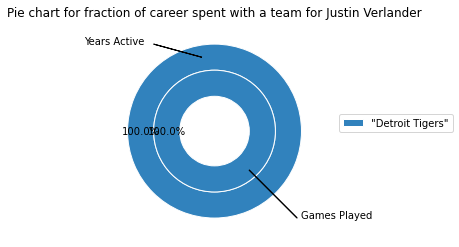

1: Line graph of games played for one player over time
2: Line graph of games played for one player over time separated by team
3: Histogram of runs scored for all players in one year (no cutoff)
4: Histogram of runs scored for all players in one year (user inputted cutoff))
5: Graph of team presence over time
6: Homeruns over time (percentiles)
7: Pie chart for fraction of career spent with each team (games played and years active)
8: Radar chart of player statistics in a certain position
0: Exit


In [27]:
main()